In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
os.chdir("training data csv file")
os.getcwd()

'f:\\PythonProject\\sklearn\\training data csv file'

In [37]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data', names=cols)

In [38]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [39]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [40]:
df['class'] = (df['class'] == 'g').astype(int)

In [41]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


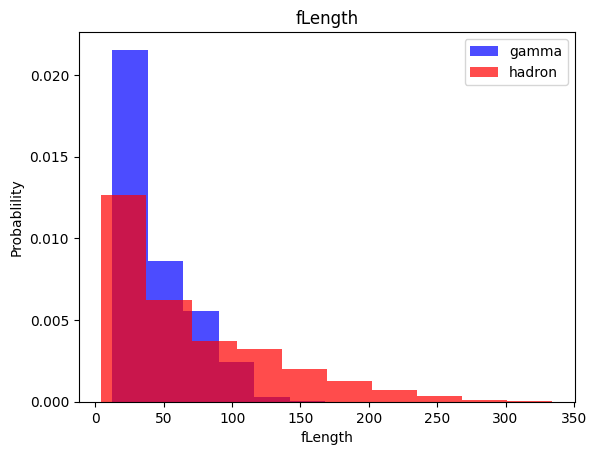

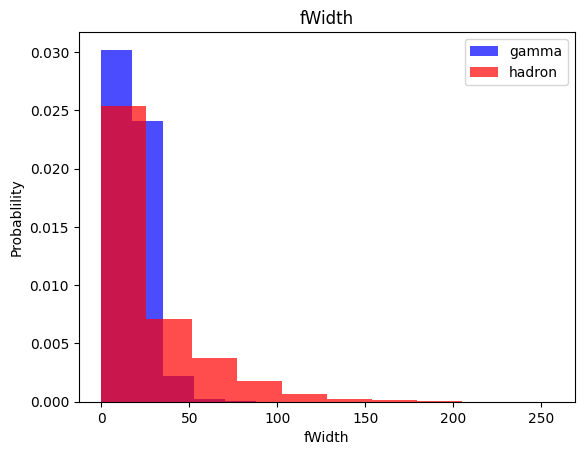

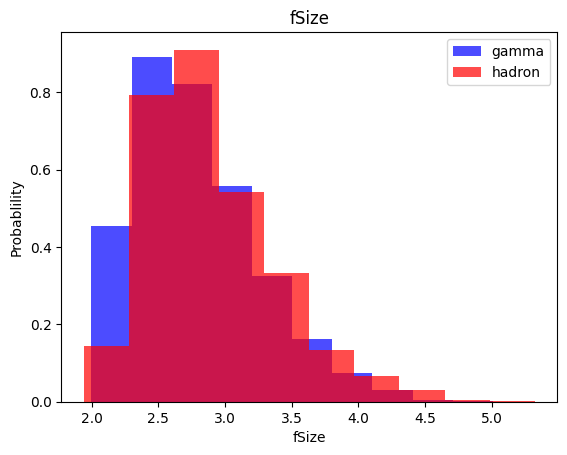

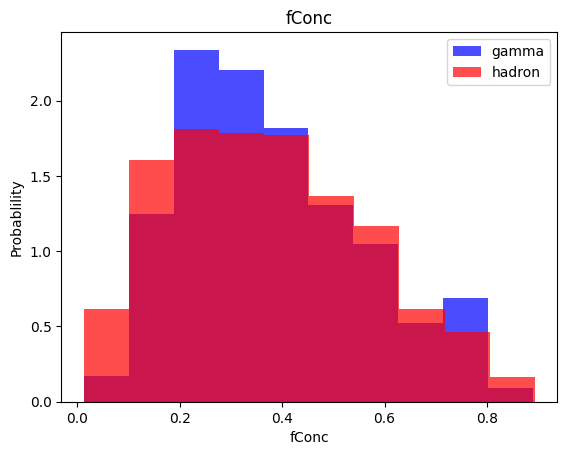

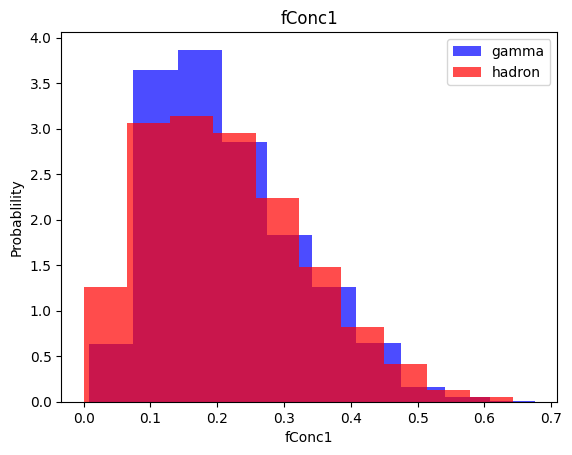

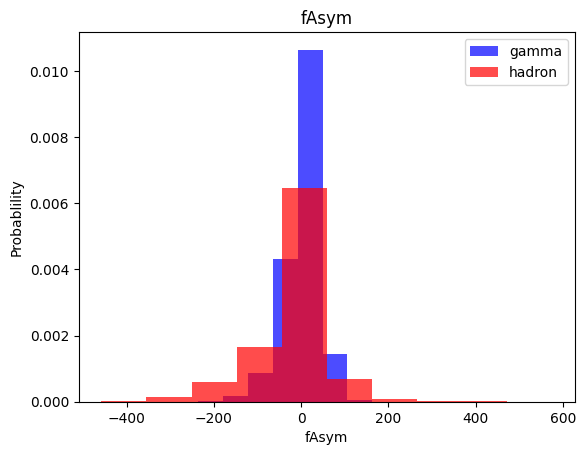

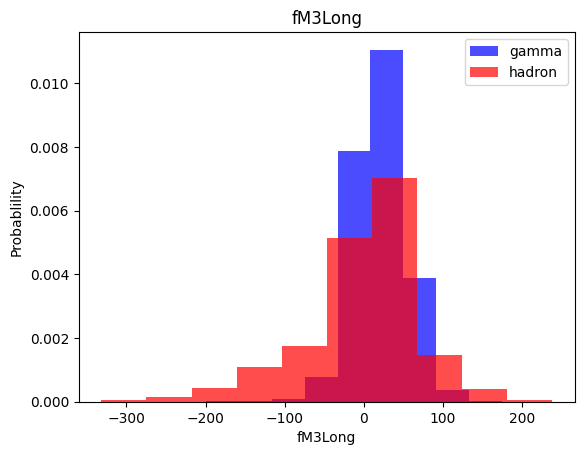

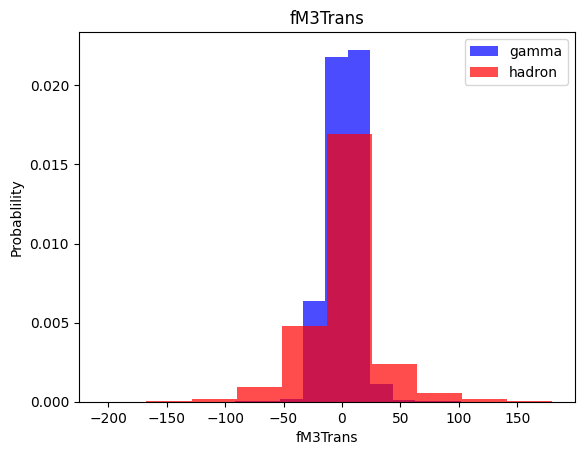

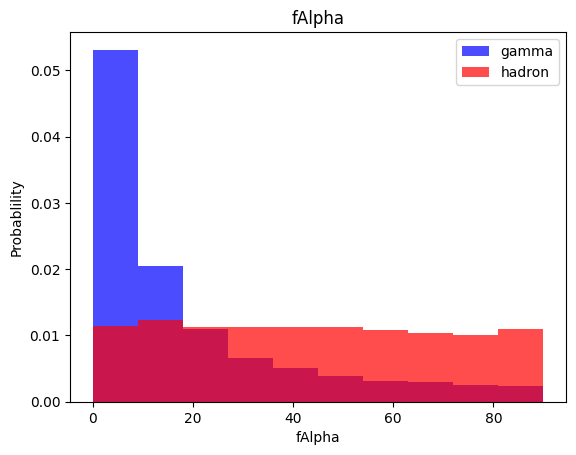

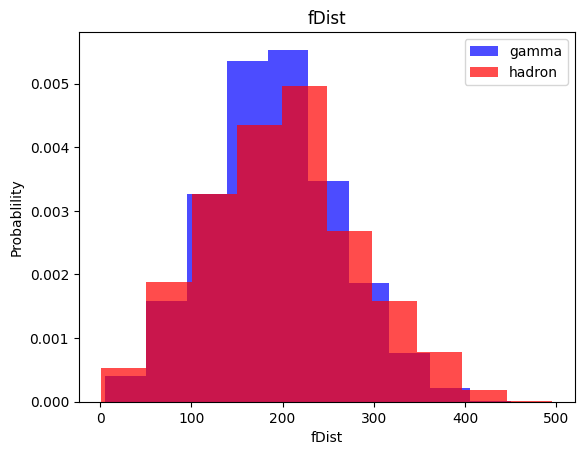

In [139]:
for lable in cols[:-1]:
    plt.hist(df[df['class'] == 1][lable], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][lable], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(lable)
    plt.xlabel(lable)
    plt.ylabel('Probablility')
    plt.legend()
    plt.show()

# Train, Validation, test dataset

In [114]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [115]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [116]:
len(train[train['class'] == 1])

7420

In [117]:
len(train[train['class'] == 0])

3992

In [118]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

# K-Nearest Neighbours Model
Will take nearest n values from the point K

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [136]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [137]:
y_pred = knn_model.predict(x_test)

In [131]:
# n_neighbors=1
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1380
           1       0.82      0.89      0.86      2424

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [135]:
# n_neighbors=3
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1380
           1       0.85      0.86      0.86      2424

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [138]:
# n_neighbors=5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1380
           1       0.85      0.87      0.86      2424

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [143]:
y_pred = nb_model.predict(x_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1380
           1       0.73      0.89      0.80      2424

    accuracy                           0.72      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regresstion

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

In [147]:
y_pred = lg_model.predict(x_test)

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1380
           1       0.84      0.81      0.83      2424

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machine (SVM)

In [149]:
from sklearn.svm import SVC

In [151]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [152]:
y_pred = svm_model.predict(x_test)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1380
           1       0.89      0.90      0.89      2424

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

